<a href="https://colab.research.google.com/github/xsayaa/AI/blob/main/Final_Project_Team3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PIA
Sadya Mariana Martínez Fuerte - 1957307

Katia Fernanda Godinez González - 1945000

Isaac Ulises Gutiérrez Ortega - 2077368

Diego Alejandro Banda Ibarra - 1870295

Dataset: https://www.kaggle.com/code/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia/input

In [37]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau



In [38]:
!pip install kaggle
from google.colab import files

In [39]:
files.upload()

Saving intro-to-cnn-using-keras-to-predict-pneumonia.ipynb to intro-to-cnn-using-keras-to-predict-pneumonia.ipynb


{'intro-to-cnn-using-keras-to-predict-pneumonia.ipynb': b'{"cells":[{"metadata":{"_uuid":"ad4c6cdddda8361c6ceb3dc5030180a8a5fa2c53"},"cell_type":"markdown","source":"# <font color=\'purple\'>The purpose of this exercise is to see how accurate of a Neural Network we can create to classify X-Ray scans from patients with pneumonia. </font>\\n\\n![https://media.giphy.com/media/l0MYtoPNAQ0YCgNVe/giphy.gif](https://media.giphy.com/media/l0MYtoPNAQ0YCgNVe/giphy.gif)"},{"metadata":{"_uuid":"b7ae7f85f701da5ac77f3e12ec508d3c898b66f3"},"cell_type":"markdown","source":"# <font color =\'purple\'>Let\'s start by Importing the required libraries </font>"},{"metadata":{"_uuid":"8f2839f25d086af736a60e9eeb907d3b93b6e0e5","_cell_guid":"b1076dfc-b9ad-4769-8c92-a6c4dae69d19","trusted":true},"cell_type":"code","source":"\\nimport numpy as np # forlinear algebra\\nimport matplotlib.pyplot as plt #for plotting things\\nimport os\\nfrom PIL import Image\\nprint(os.listdir(\\"../input\\"))\\n\\n# Keras Librarie

In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [44]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:25<00:00, 101MB/s] 
100% 2.29G/2.29G [00:25<00:00, 96.6MB/s]


In [45]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/chest-xray-pneumonia.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [46]:
import os

dataset_folder = '/content/Dataset'
for dirname, _, filenames in os.walk(dataset_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1008-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/IM-0517-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/IM-0444-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-0830-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/IM-0240-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-0465-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1262-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-0847-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1321-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1152-0001-0002.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1001-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-0478-0001.jpeg
/content/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-0730-0001.jpeg
/content/

In [48]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [49]:
train = get_training_data('/content/Dataset/chest_xray/train')
test = get_training_data('/content/Dataset/chest_xray/test')
val = get_training_data('/content/Dataset/chest_xray/val')

<ipython-input-48-b2613b36a4a4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


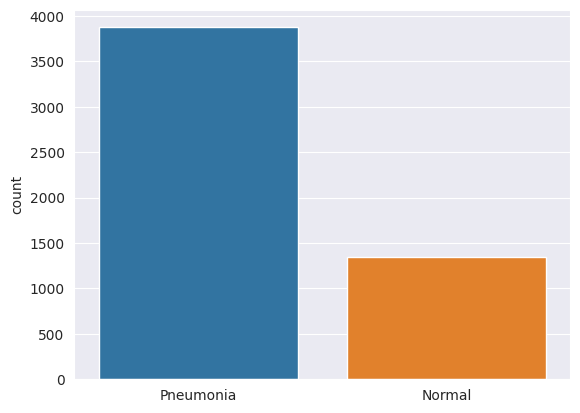

In [50]:
l = []
for i in train:
    if i[1] == 0:  # Assuming 0 represents Pneumonia
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(x=l)  # Use the `x` parameter to specify the data
plt.show()

Text(0.5, 1.0, 'NORMAL')

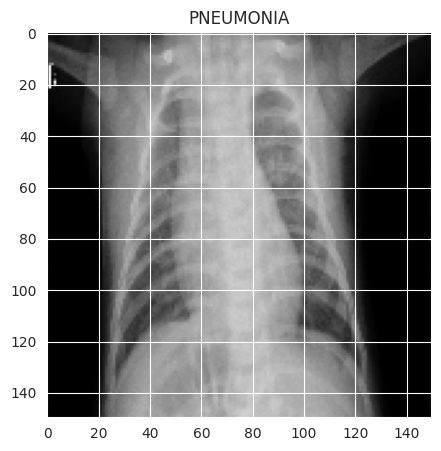

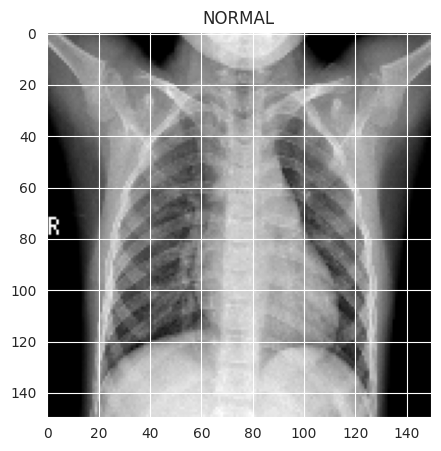

In [51]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [82]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [83]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [84]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [85]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip=False)
datagen.fit(x_train)

In [86]:
#Training the model
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_5 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 75, 75, 64)       

In [87]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [88]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 378s 2s/step - loss: 0.4763 - accuracy: 0.8543 - val_loss: 53.9140 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 338s 2s/step - loss: 0.2664 - accuracy: 0.8993 - val_loss: 53.8254 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2126 - accuracy: 0.9248
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 326s 2s/step - loss: 0.2126 - accuracy: 0.9248 - val_loss: 15.6250 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 325s 2s/step - loss: 0.1477 - accuracy: 0.9475 - val_loss: 3.2663 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 326s 2s/step - loss: 0.1342 - accuracy: 0.9513 - val_loss: 0.5253 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 6/12
163/163 [============================

In [89]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 8s 405ms/step - loss: 0.2876 - accuracy: 0.9119
Loss of the model is -  0.2875857353210449
20/20 [==============================] - 9s 410ms/step - loss: 0.2876 - accuracy: 0.9119
Accuracy of the model is -  91.18589758872986 %


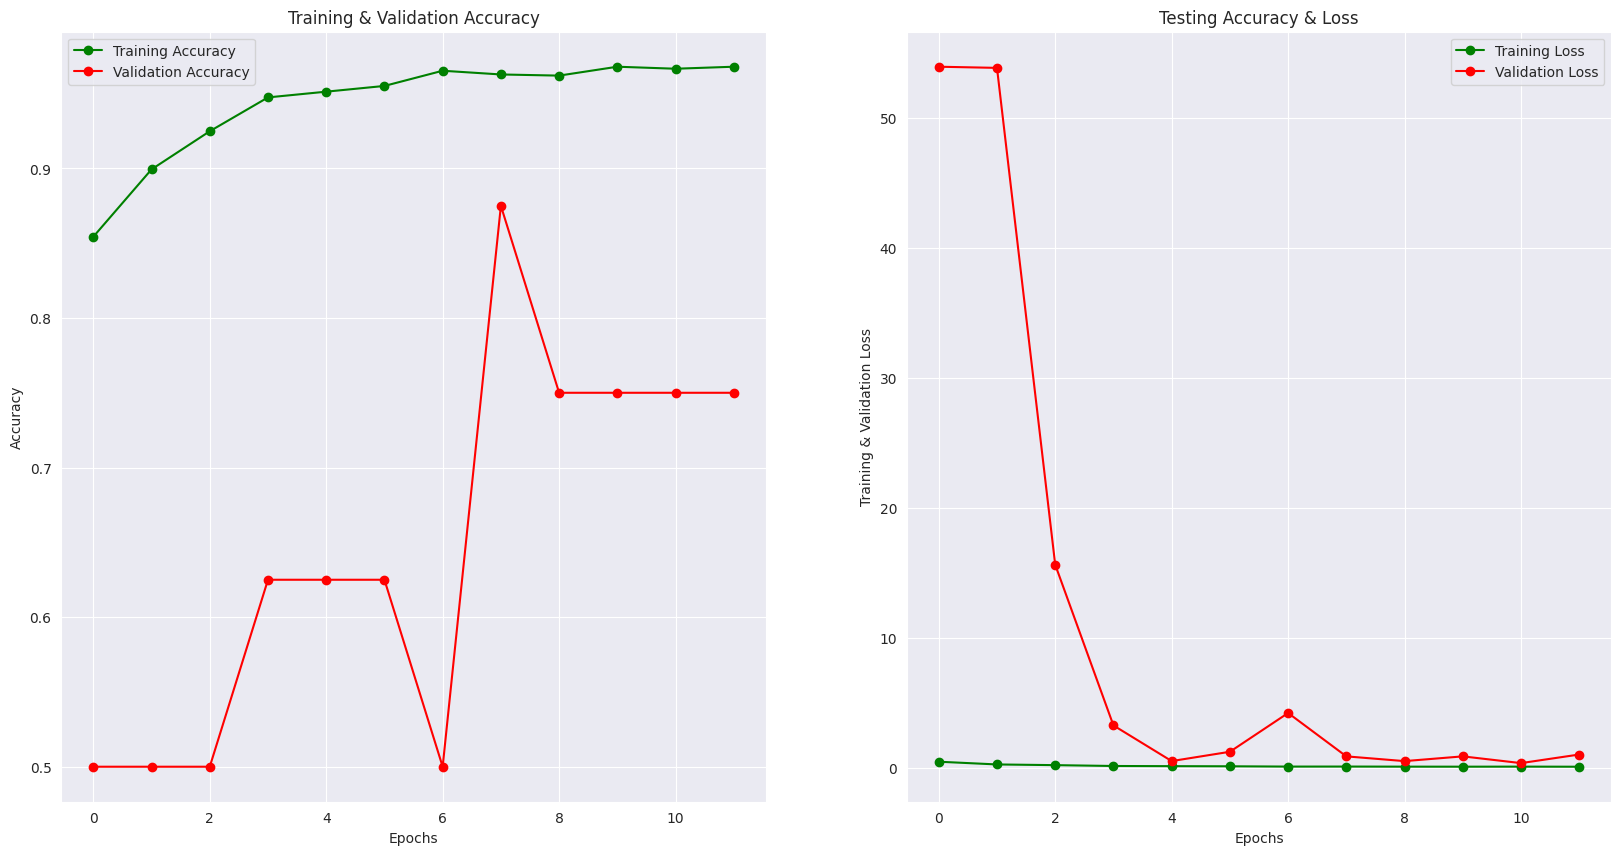

In [90]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [93]:
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions[:10])

20/20 [==============================] - 10s 503ms/step
[0 0 0 0 0 0 0 0 0 0]


In [94]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.62      1.00      0.77       390
   Normal (Class 1)       0.00      0.00      0.00       234

           accuracy                           0.62       624
          macro avg       0.31      0.50      0.38       624
       weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


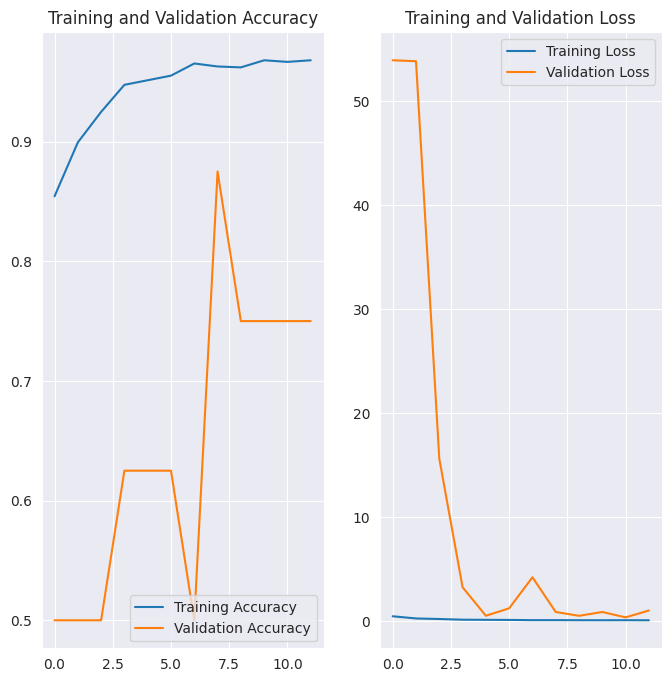

In [95]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
